# One VS Rest

In [1]:
import pylab as pl
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#read the data set
df = pd.read_csv('./data/joinedData.csv', sep=r'\s*(?:\||\#|\,)\s*',
                 engine='python')

In [3]:
#change the 5 tumour types to numbers
Class = {'LUAD': 0,'BRCA': 1,'KIRC': 2,'PRAD': 3,'COAD': 4} 
#this is where we add the class to the table
df.Class = [Class[item] for item in df.Class]
#drop the 2 unnamed table because we do not need them
df = df.drop('Unnamed: 0',1)
df = df.drop('Unnamed: 0.1',1)
df

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,3,0.000000,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.000000,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0,0.000000,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,3,0.000000,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,3,0.000000,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,1,0.000000,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
5,3,0.000000,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.000000,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.000000
6,2,0.000000,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.000000,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.000000
7,3,0.000000,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.000000,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.000000
8,1,0.000000,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.000000,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.000000
9,3,0.000000,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.000000,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.000000


In [4]:
X = df.drop('Class', axis=1).values
y = df['Class'].values
y = np.asarray(y)

In [5]:
#Standardize data
X = (X - X.mean()) / (X.max() - X.min())

In [6]:
df = df[['Class','gene_219', 'gene_220', 'gene_450', 'gene_1858', 'gene_3439',
       'gene_3737', 'gene_3921', 'gene_6733', 'gene_7421', 'gene_7896',
       'gene_7964', 'gene_9175', 'gene_9176', 'gene_13818', 'gene_14114',
       'gene_15895', 'gene_15898', 'gene_16169', 'gene_16392', 'gene_18135']]

In [7]:
df.head()

,Class,gene_219,gene_220,gene_450,gene_1858,gene_3439,gene_3737,gene_3921,gene_6733,gene_7421,...,gene_7964,gene_9175,gene_9176,gene_13818,gene_14114,gene_15895,gene_15898,gene_16169,gene_16392,gene_18135
0,3,0.591871,0.591871,0.000000,0.000000,3.266292,11.057694,0.591871,2.717803,10.773288,...,5.248778,17.173570,18.525161,2.476226,0.000000,0.000000,1.334282,3.478079,3.410884,6.878308
1,0,0.000000,0.000000,0.000000,0.000000,0.323658,0.323658,0.587845,2.592278,10.343597,...,3.890826,0.000000,0.000000,0.000000,0.000000,10.068832,13.609213,0.000000,0.811142,0.000000
2,3,0.000000,0.452595,0.000000,0.000000,0.000000,9.709277,0.796598,1.306846,12.709913,...,1.074163,14.818422,16.053597,0.000000,0.000000,0.000000,1.074163,0.000000,1.306846,12.900029
3,3,1.039419,0.434882,0.000000,0.000000,0.000000,10.421613,0.000000,0.000000,12.493828,...,2.650029,17.371079,18.371794,0.000000,0.434882,0.000000,0.434882,0.768587,0.434882,13.907304
4,1,0.000000,0.000000,0.360982,0.360982,0.000000,0.360982,1.095654,0.360982,11.726508,...,0.000000,1.580097,0.000000,1.095654,0.000000,0.000000,1.095654,0.649386,1.435949,0.000000


In [8]:
X = df.drop('Class', axis=1).values
y = df['Class'].values
y = np.asarray(y)
X

array([[ 0.59187087,  0.59187087,  0.        , ...,  3.47807874,
         3.41088378,  6.87830846],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.81114217,  0.        ],
       [ 0.        ,  0.45259543,  0.        , ...,  0.        ,
         1.3068455 , 12.90002902],
       ...,
       [ 1.00259452,  0.        ,  0.        , ...,  0.        ,
         2.003926  ,  3.91177785],
       [ 0.        ,  0.        ,  0.        , ...,  1.57874554,
         2.45177819, 12.7412563 ],
       [ 1.60392895,  0.        ,  0.        , ...,  1.23866459,
         0.        ,  8.39023346]])

In [9]:
#Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  1.325962  ,
         1.81212852, 12.44924152],
       [ 1.72935699,  0.99457972,  4.21207902, ...,  0.73257312,
         0.41229377,  0.        ],
       [ 0.51601515,  0.        ,  0.        , ...,  1.1952846 ,
         0.89522505, 13.49994552],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.79052184,
         0.        ,  1.97033831],
       [ 1.34539638,  2.02931152,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.56676645,
         0.        ,  0.        ]])

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

#MultiClassOnevsRestClassifier

clf5 = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
print("MultiClassOnevsRestClassifier prediction :",clf5.predict(X_test))
lrTest = clf5.predict(X_test)
print("MultiClassOnevsRestClassifier score :", accuracy_score(y_test,lrTest)) 

MultiClassOnevsRestClassifier prediction : [0 1 2 1 1 3 0 4 3 3 1 2 1 2 1 2 1 1 2 0 3 2 0 2 4 1 0 3 1 0 2 0 1 2 1 1 1
 2 2 3 2 0 0 1 3 1 1 0 4 4 3 3 0 0 3 1 1 0 0 2 3 1 0 1 0 0 2 2 2 1 0 4 2 1
 2 2 1 2 2 0 1 3 2 4 0 4 1 1 1 1 1 2 3 1 1 3 2 4 1 0 1 3 1 0 3 1 0 0 0 4 2
 1 0 3 0 2 2 4 0 2 4 1 3 4 2 1 4 0 1 0 1 3 0 1 1 3 0 2 1 1 0 3 2 1 2 1 1 1
 0 1 1 1 4 4 0 1 3 3 4 2 1]
MultiClassOnevsRestClassifier score : 0.9875776397515528


In [12]:
res = clf5.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,res))  
print(classification_report(y_test,res))

[[34  0  0  0  0]
 [ 0 54  0  1  0]
 [ 0  0 33  0  0]
 [ 0  0  0 22  0]
 [ 1  0  0  0 16]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        55
           2       1.00      1.00      1.00        33
           3       0.96      1.00      0.98        22
           4       1.00      0.94      0.97        17

   micro avg       0.99      0.99      0.99       161
   macro avg       0.99      0.98      0.98       161
weighted avg       0.99      0.99      0.99       161



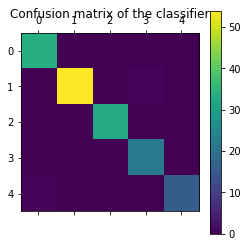

In [13]:
cm = confusion_matrix(y_test, res)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

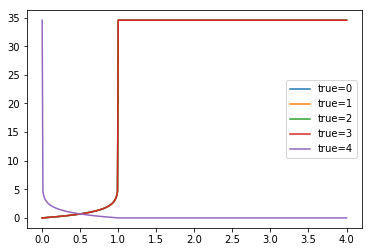

In [14]:
from sklearn.metrics import log_loss
from matplotlib import pyplot
#loss = log_loss(y_test, knnresd)
yhat = [x*0.01 for x in range(0, 401)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,4]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,4]) for x in yhat]
losses_2 = [log_loss([2], [x], labels=[0,4]) for x in yhat]
losses_3 = [log_loss([3], [x], labels=[0,4]) for x in yhat]
losses_4 = [log_loss([4], [x], labels=[0,4]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.plot(yhat, losses_2, label='true=2')
pyplot.plot(yhat, losses_3, label='true=3')
pyplot.plot(yhat, losses_4, label='true=4')
pyplot.legend()
pyplot.show()

# References

#### https://scikit-learn.org/stable/modules/multiclass.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
#### https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier
#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
#### https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

###  References in Vancouver
#### 1. 1.12. Multiclass and multilabel algorithms — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/multiclass.html
#### 2. sklearn.svm.LinearSVC — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
#### 3. sklearn.gaussian_process.GaussianProcessClassifier — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier
#### 4. sklearn.linear_model.LogisticRegression — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
#### 5. 3.2.4.1.5. sklearn.linear_model.LogisticRegressionCV — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV